<center><img src = "/home/chibana/Documents/GitHub/Study_Area/Python/Data_Trading/Modulo 2/Imagens/logotipo-trading-com-dados-branco.svg?raw=true" width = "250">

<center><PMF 001.png>

<center><img src = "/home/chibana/Documents/GitHub/Study_Area/Python/Data_Trading/Modulo 2/Imagens/PMF 001.png?raw=true" width = "500">

# **Python para Mercado Financeiro**

O objetivo deste modulo e dar inicio ao processo de transformacao e processamento de dados utilizando a biblioteca Pandas. Assim, vamos deixar nossos dados no formato que precisamos antes de realizar as analises de mercado financeiro e construcao de estrategias. Alem disso, mostraremos como filtrar, modificar e juntar diferentes tipos de dados.

Por fim, entraremos em conceitos de financas quantitativas e mostraremos como obter e manipular dados de mercado financeiro usando diferentes bibliotecas.

Este modulo abrange as seguintes seccoes:

**1. Nocoes basicas de obtencao e processamento de dados**\
**2. Manipulacao de dados**\
**3. Consolidacao de dataframes**\
**4. Financas quantitativas**

### 2. Manipulacao de dados

In [2]:
import pandas as pd

In [3]:
pd.read_csv('/home/chibana/Documents/GitHub/Study_Area/Python/Data_Trading/Modulo 2/Data/cotacoes_pd_series.csv')

,Date;Adj Close
0,04/01/2010;13.81743431
1,05/01/2010;13.6989584
2,06/01/2010;13.88407612
3,07/01/2010;13.75449371
4,08/01/2010;13.68044472
...,...
3212,13/12/2022;23.31999969
3213,14/12/2022;21.46999931
3214,15/12/2022;22.04000092
3215,16/12/2022;22.04999924


Estamos com alguns problemas de formatacao

In [4]:
pd.read_csv('/home/chibana/Documents/GitHub/Study_Area/Python/Data_Trading/Modulo 2/Data/cotacoes_pd_series.csv', sep = ';', index_col = 0)

,Adj Close
Date,
04/01/2010,13.817434
05/01/2010,13.698958
06/01/2010,13.884076
07/01/2010,13.754494
08/01/2010,13.680445
...,...
13/12/2022,23.320000
14/12/2022,21.469999
15/12/2022,22.040001


In [10]:
cotacoes = pd.read_csv('/home/chibana/Documents/GitHub/Study_Area/Python/Data_Trading/Modulo 2/Data/cotacoes_pd_series.csv', sep= ';', index_col= 0)

In [11]:
cotacoes

,Adj Close
Date,
04/01/2010,13.817434
05/01/2010,13.698958
06/01/2010,13.884076
07/01/2010,13.754494
08/01/2010,13.680445
...,...
13/12/2022,23.320000
14/12/2022,21.469999
15/12/2022,22.040001


In [16]:
cotacoes.index = pd.to_datetime(cotacoes.index, dayfirst= True )

In [17]:
cotacoes

,Adj Close
Date,
2010-01-04,13.817434
2010-01-05,13.698958
2010-01-06,13.884076
2010-01-07,13.754494
2010-01-08,13.680445
...,...
2022-12-13,23.320000
2022-12-14,21.469999
2022-12-15,22.040001


In [18]:
cotacoes.dtypes

Adj Close    float64
dtype: object

#### 2.1. Dataframe simples (uma coluna) vs Pandas Series

 Observe a estrutura do objeto abaixo. Perceba que ele nao possui tao claramente as delimitacoes de index e colunas tipicas do Dataframe.\
 Trata-se de outro objeto importante da Pandas : as Series

In [20]:
cotacoes['Adj Close']

Date
2010-01-04    13.817434
2010-01-05    13.698958
2010-01-06    13.884076
2010-01-07    13.754494
2010-01-08    13.680445
                ...    
2022-12-13    23.320000
2022-12-14    21.469999
2022-12-15    22.040001
2022-12-16    22.049999
2022-12-19    22.350000
Name: Adj Close, Length: 3217, dtype: float64

Dataframes podem ser um pouco mais faceis visualizar e trabalhar. Veja algumas formas de trabalhar a transicao entre Pandas Series e Pandas Dataframes

In [21]:
cotacoes[['Adj Close']]

,Adj Close
Date,
2010-01-04,13.817434
2010-01-05,13.698958
2010-01-06,13.884076
2010-01-07,13.754494
2010-01-08,13.680445
...,...
2022-12-13,23.320000
2022-12-14,21.469999
2022-12-15,22.040001


Transformar uma serie para df

In [23]:
type(cotacoes['Adj Close'])

pandas.core.series.Series

In [24]:
cotacoes['Adj Close'].to_frame

<bound method Series.to_frame of Date
2010-01-04    13.817434
2010-01-05    13.698958
2010-01-06    13.884076
2010-01-07    13.754494
2010-01-08    13.680445
                ...    
2022-12-13    23.320000
2022-12-14    21.469999
2022-12-15    22.040001
2022-12-16    22.049999
2022-12-19    22.350000
Name: Adj Close, Length: 3217, dtype: float64>

#### 2.2. Manipulacoes Iniciais

In [25]:
petr = pd.read_csv('/home/chibana/Documents/GitHub/Study_Area/Python/Data_Trading/Modulo 2/Data/PETR4.csv')

In [26]:
petr.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,5.875,5.875,5.875,5.875,1.872027,35389440000
1,2000-01-04,5.550,5.550,5.550,5.550,1.768469,28861440000
2,2000-01-05,5.494,5.494,5.494,5.494,1.750625,43033600000
3,2000-01-06,5.475,5.475,5.475,5.475,1.744570,34055680000
4,2000-01-07,5.500,5.500,5.500,5.500,1.752536,20912640000


Perceba que no nosso dataframe a data esta como coluna, e nao como indice.\
Mas o que e o indice de um data frame afina?

Transformando a data em indice

In [27]:
petr.index = petr.Date

In [28]:
petr.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-01-03,2000-01-03,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-04,2000-01-04,5.550,5.550,5.550,5.550,1.768469,28861440000
2000-01-05,2000-01-05,5.494,5.494,5.494,5.494,1.750625,43033600000
2000-01-06,2000-01-06,5.475,5.475,5.475,5.475,1.744570,34055680000
2000-01-07,2000-01-07,5.500,5.500,5.500,5.500,1.752536,20912640000


Observe que agora a data se tornou o indice

Vamos agora remover entao a coluna 'Date' para que nao haja redundancia

In [31]:
petr.drop(['Date'], axis = 1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


In [32]:
petr

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-01-03,2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...,...
2022-12-13,2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


Repare que a coluna 'Date' voltou

Vamos garantir que as operacoes tenham validade global

In [33]:
petr.drop(['Date', 'Volume'], axis = 1, inplace = True)

In [36]:
petr

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
1,2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2,2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
3,2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
4,2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...,...
5765,2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
5766,2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
5767,2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600
5768,2022-12-16,21.959999,22.110001,21.510000,22.049999,22.049999,90767300


Agora chegaremos ao mesmo objetivo mas de outra forma. Essa e uma das muitas belezas da programacao.\
Carregando novamente para o index original

In [37]:
petr = pd.read_csv('/home/chibana/Documents/GitHub/Study_Area/Python/Data_Trading/Modulo 2/Data/PETR4.csv')

In [40]:
petr = petr.set_index('Date')

In [41]:
petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


E se quisessemos criar um novo dataframe contendo apenas as informacoes de cotacao e exluindo o Volume? Precisamos usar o metodo .copy

In [42]:
cotacoes_petr = petr.copy()

In [43]:
cotacoes_petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


In [44]:
cotacoes_petr.drop(['Volume'], axis = 1, inplace = True)

In [45]:
cotacoes_petr.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001
2022-12-16,21.959999,22.110001,21.510000,22.049999,22.049999
2022-12-19,22.100000,22.469999,21.639999,22.350000,22.350000


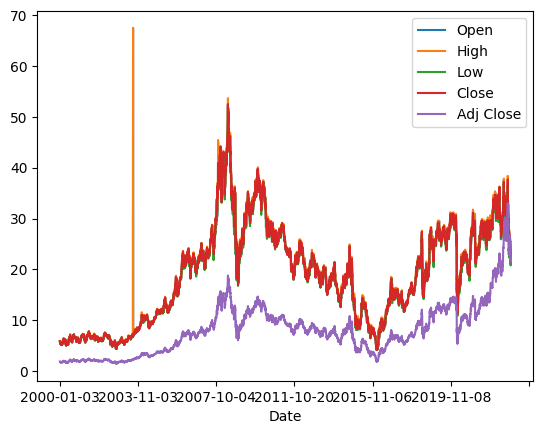

In [46]:
cotacoes_petr.plot();

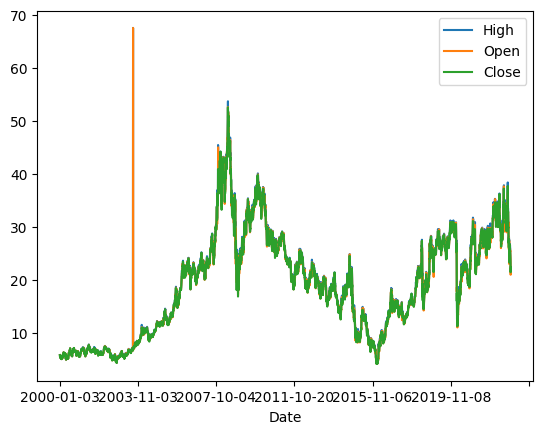

In [47]:
cotacoes_petr[['High', 'Open', 'Close']].plot();

E se quisessemos da um zoom em datas mais recentes?\
Por exemplo, nos 100 pregoes mais recentes?

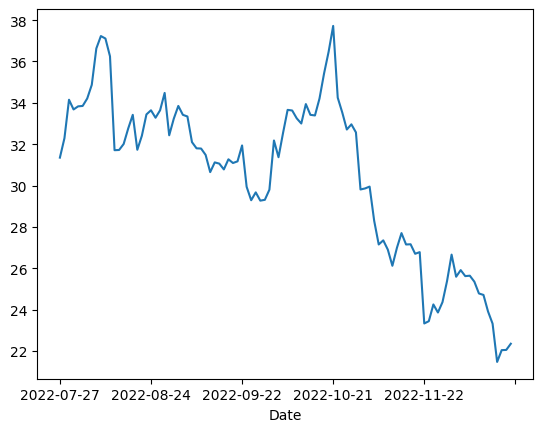

In [50]:
cotacoes_petr.tail(100).Close.plot();

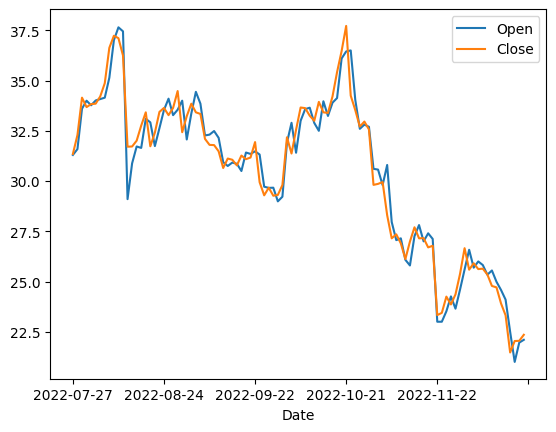

In [52]:
cotacoes_petr.tail(100)[['Open', 'Close']].plot();

Podemos tambem utilizar o operador slicing

In [53]:
cotacoes_petr[0:10]

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027
2000-01-04,5.550,5.550,5.550,5.550,1.768469
2000-01-05,5.494,5.494,5.494,5.494,1.750625
2000-01-06,5.475,5.475,5.475,5.475,1.744570
2000-01-07,5.500,5.500,5.500,5.500,1.752536
2000-01-10,5.613,5.613,5.613,5.613,1.788543
2000-01-11,5.475,5.475,5.475,5.475,1.744570
2000-01-12,5.483,5.483,5.483,5.483,1.747119
2000-01-13,5.325,5.325,5.325,5.325,1.696774


In [55]:
cotacoes_petr[:-1]

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536
...,...,...,...,...,...
2022-12-12,24.580000,24.660000,23.129999,23.910000,23.910000
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999


In [56]:
cotacoes_petr[-3 :]

,Open,High,Low,Close,Adj Close
Date,,,,,
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001
2022-12-16,21.959999,22.110001,21.510000,22.049999,22.049999
2022-12-19,22.100000,22.469999,21.639999,22.350000,22.350000


#### 2.3. Acessar celulas especificas do dataframe: filtros simples e shift

Imagine que voce precisa selecionar alguns valores de OHLC para dias especificos. Como voce poderia fazer?\
E para resolver problemas assim que existe os metodos .loc e .iloc. Como eles funcionam.\
Uma das ideias desses metodos e de possibilitar um filtro nos nossos dados para obter uma linha ou celula especifica.

In [57]:
cotacoes_petr.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027
2000-01-04,5.550,5.550,5.550,5.550,1.768469
2000-01-05,5.494,5.494,5.494,5.494,1.750625
2000-01-06,5.475,5.475,5.475,5.475,1.744570
2000-01-07,5.500,5.500,5.500,5.500,1.752536


##### 2.3.1. O metodo .loc

O .loc e utilizado quando o filtro deve ser feito com a metrica utilizada no indice do nosso data frame .\
Por exemplo, a metrica utilizada como indice do nosso dataframe e data. Portanto, nesse caso devemos usar o .loc com a data que queremos fazer o filtro.\
Imagine que o seu gestor te perguntou quais eram os valores de OHLC de PETR4 no dia 26/05/21

Voce poderia ter feito assim:

In [60]:
cotacoes_petr.loc['2021-05-26']

Open         25.910000
High         26.180000
Low          25.650000
Close        26.090000
Adj Close    12.809803
Name: 2021-05-26, dtype: float64

In [62]:
petr_filtrada = cotacoes_petr.loc['2021-05-26']
petr_filtrada

Open         25.910000
High         26.180000
Low          25.650000
Close        26.090000
Adj Close    12.809803
Name: 2021-05-26, dtype: float64

Para obter os dados entre duas datas especificas

In [64]:
petr_filtrada = cotacoes_petr.loc[ '2020-01-01' :'2021-05-26']
petr_filtrada

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-01-02,30.510000,30.700001,30.309999,30.700001,14.581381
2020-01-03,30.879999,31.240000,30.450001,30.450001,14.462637
2020-01-06,30.430000,30.940001,29.950001,30.809999,14.633623
2020-01-07,30.820000,30.879999,30.469999,30.690001,14.576632
2020-01-08,30.690001,30.770000,30.240000,30.500000,14.486386
...,...,...,...,...,...
2021-05-20,26.150000,26.280001,25.719999,25.930000,12.731244
2021-05-21,26.080000,26.309999,25.940001,25.950001,12.741065
2021-05-24,26.280001,26.520000,25.990000,26.389999,12.957099


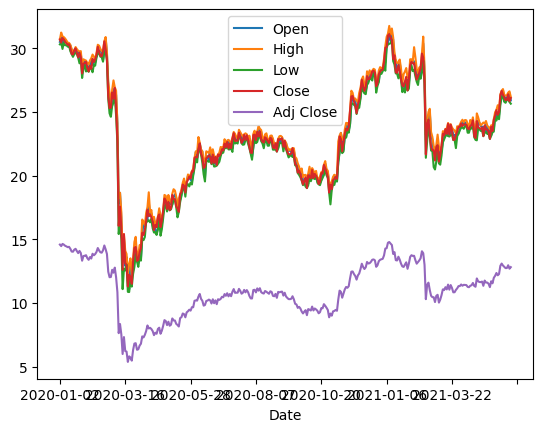

In [66]:
petr_filtrada.plot();

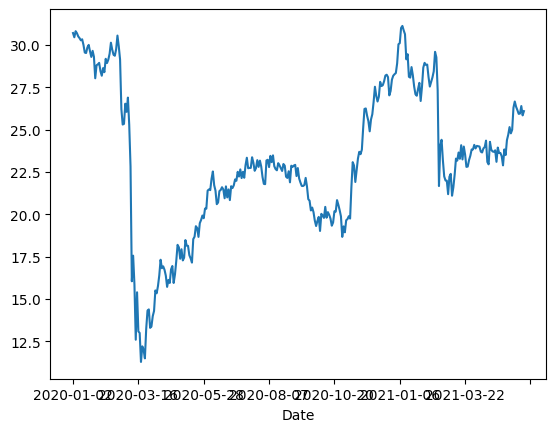

In [68]:
petr_filtrada = cotacoes_petr.loc[ '2020-01-01' :'2021-05-26', 'Close']
petr_filtrada.plot();

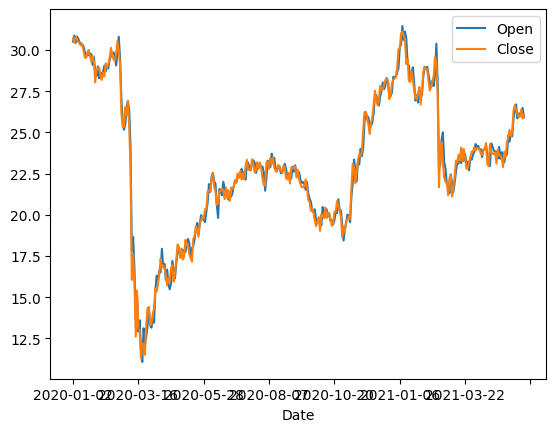

In [69]:
petr_filtrada = cotacoes_petr.loc[ '2020-01-01' :'2021-05-26', ['Open', 'Close']]
petr_filtrada.plot();

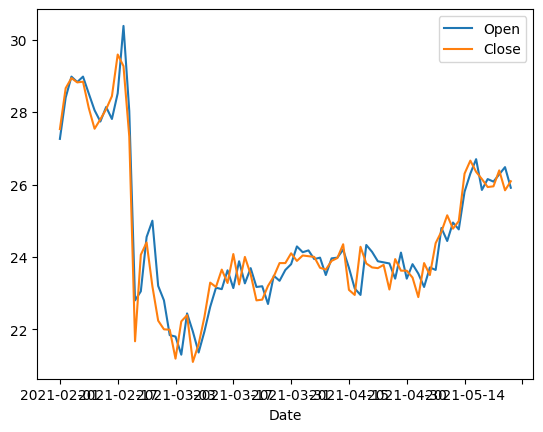

In [70]:
petr_filtrada = cotacoes_petr.loc[ '2021-02-01' :'2021-05-26', ['Open', 'Close']]
petr_filtrada.plot();

Filtrando a partir de uma data especifica e indo ate o ultimo dia disponivel

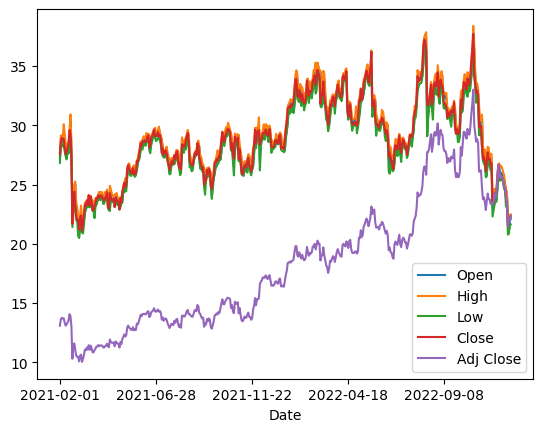

In [72]:
petr_filtrada = cotacoes_petr.loc['2021-02-01' :]
petr_filtrada.plot();

Obtendo dados desde o inicio e indo ate uma data limite especifica, nesse caso 26/03/2017 

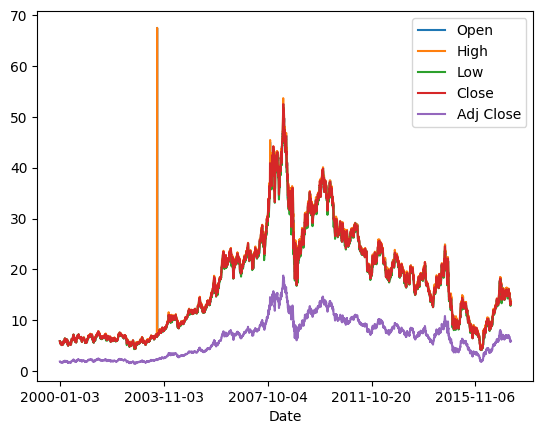

In [74]:
petr_filtrada = cotacoes_petr.loc[: '2017-03-26']
petr_filtrada.plot();

##### 2.3.2. O metodo. iloc

O .iloc e utilizado quando o filtro deve ser feito com a posicao da linha dentro do nosso dataframe.\
Por exemplo, caso voce precise da linha 0 ou linha 1. Ou mesmo se precisar da linha 200 ate a linha 500.\
Exemplos:

In [75]:
# Obtendo a linha 0

cotacoes_petr.iloc[0]

Open         5.875000
High         5.875000
Low          5.875000
Close        5.875000
Adj Close    1.872027
Name: 2000-01-03, dtype: float64

In [76]:
# obtendo a linha 200

cotacoes_petr.iloc[200]

Open         6.487500
High         6.487500
Low          6.487500
Close        6.487500
Adj Close    2.067196
Name: 2000-10-09, dtype: float64

In [77]:
# obtendo a ultima linha

cotacoes_petr.iloc[-1]

Open         22.100000
High         22.469999
Low          21.639999
Close        22.350000
Adj Close    22.350000
Name: 2022-12-19, dtype: float64

In [78]:
# obtendo da linha 20 ate 200

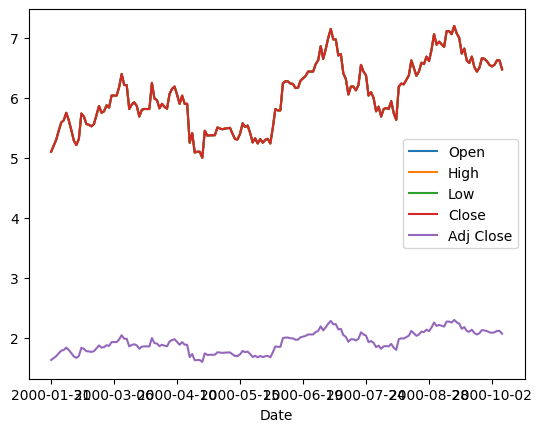

In [79]:
petr_filtrada = cotacoes_petr.iloc[20 : 200]
petr_filtrada.plot();

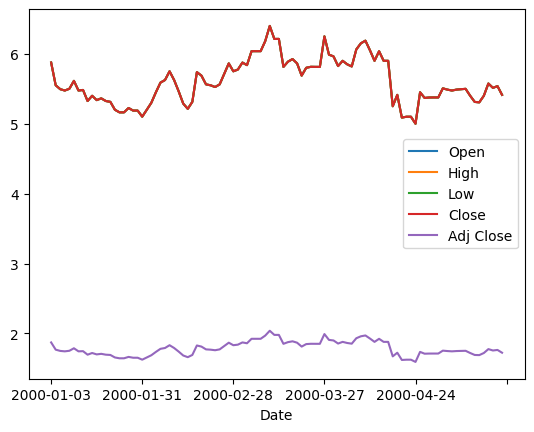

In [80]:
# obtendo da linha 0 ate a 100

petr_filtrada = cotacoes_petr.iloc[ : 100]
petr_filtrada.plot();

In [81]:
# incluindo o filtro de linhas e colunas

cotacoes_petr.iloc[0 : 5, [3, 4]]

,Close,Adj Close
Date,,
2000-01-03,5.875,1.872027
2000-01-04,5.550,1.768469
2000-01-05,5.494,1.750625
2000-01-06,5.475,1.744570
2000-01-07,5.500,1.752536


In [82]:
# fazendo o filtro especificando o nome das colunas

cotacoes_petr.loc[:,['Open', 'Close']]

,Open,Close
Date,,
2000-01-03,5.875000,5.875000
2000-01-04,5.550000,5.550000
2000-01-05,5.494000,5.494000
2000-01-06,5.475000,5.475000
2000-01-07,5.500000,5.500000
...,...,...
2022-12-13,24.100000,23.320000
2022-12-14,22.500000,21.469999
2022-12-15,21.000000,22.040001


In [85]:
# incluindo linhas de 2 em 2

cotacoes_petr.loc[: :2,['Open', 'Close']]

,Open,Close
Date,,
2000-01-03,5.875000,5.875000
2000-01-05,5.494000,5.494000
2000-01-07,5.500000,5.500000
2000-01-11,5.475000,5.475000
2000-01-13,5.325000,5.325000
...,...,...
2022-12-06,25.820000,25.639999
2022-12-08,25.549999,24.780001
2022-12-12,24.580000,23.910000


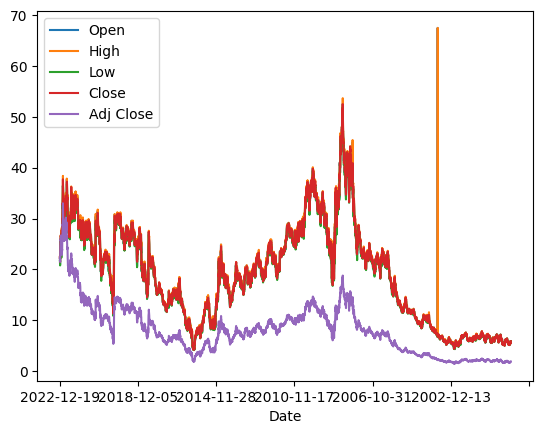

In [87]:
# invertendo os dados de tras pra frente

petr_invertida = cotacoes_petr.iloc[: :-1]
petr_invertida.plot();

##### 2.3.3. O metodo .shift

permite acessar linhas anteriores, extremamente util em dados de series temporais.\
Ex., criar uma coluna com o fechamento do dia anterior

In [88]:
cotacoes_petr.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027
2000-01-04,5.550,5.550,5.550,5.550,1.768469
2000-01-05,5.494,5.494,5.494,5.494,1.750625
2000-01-06,5.475,5.475,5.475,5.475,1.744570
2000-01-07,5.500,5.500,5.500,5.500,1.752536


In [89]:
cotacoes_petr['Close']

Date
2000-01-03     5.875000
2000-01-04     5.550000
2000-01-05     5.494000
2000-01-06     5.475000
2000-01-07     5.500000
                ...    
2022-12-13    23.320000
2022-12-14    21.469999
2022-12-15    22.040001
2022-12-16    22.049999
2022-12-19    22.350000
Name: Close, Length: 5770, dtype: float64

In [90]:
cotacoes_petr['Close'].shift()

Date
2000-01-03          NaN
2000-01-04     5.875000
2000-01-05     5.550000
2000-01-06     5.494000
2000-01-07     5.475000
                ...    
2022-12-13    23.910000
2022-12-14    23.320000
2022-12-15    21.469999
2022-12-16    22.040001
2022-12-19    22.049999
Name: Close, Length: 5770, dtype: float64

In [91]:
cotacoes_petr['Close_anterior'] = cotacoes_petr['Close'].shift(1)
cotacoes_petr.head()

,Open,High,Low,Close,Adj Close,Close_anterior
Date,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027,NaN
2000-01-04,5.550,5.550,5.550,5.550,1.768469,5.875
2000-01-05,5.494,5.494,5.494,5.494,1.750625,5.550
2000-01-06,5.475,5.475,5.475,5.475,1.744570,5.494
2000-01-07,5.500,5.500,5.500,5.500,1.752536,5.475


In [92]:
cotacoes_petr['Max_proximo_dia'] = cotacoes_petr['High'].shift(1)
cotacoes_petr.head()

,Open,High,Low,Close,Adj Close,Close_anterior,Max_proximo_dia
Date,,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.872027,NaN,NaN
2000-01-04,5.550,5.550,5.550,5.550,1.768469,5.875,5.875
2000-01-05,5.494,5.494,5.494,5.494,1.750625,5.550,5.550
2000-01-06,5.475,5.475,5.475,5.475,1.744570,5.494,5.494
2000-01-07,5.500,5.500,5.500,5.500,1.752536,5.475,5.475


#### 2.4. Indices: Explorando as Series Temporais com Index Datetime

In [2]:
import pandas as pd

In [3]:
pd.read_csv('/home/chibana/Documents/GitHub/Study_Area/Python/Data_Trading/Modulo 2/Data/PETR4.csv')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
1,2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2,2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
3,2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
4,2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...,...
5765,2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
5766,2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
5767,2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600
5768,2022-12-16,21.959999,22.110001,21.510000,22.049999,22.049999,90767300


In [6]:
petr = pd.read_csv('/home/chibana/Documents/GitHub/Study_Area/Python/Data_Trading/Modulo 2/Data/PETR4.csv', index_col= 'Date')
petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


In [7]:
petr.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
petr.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09', '2022-12-12',
       '2022-12-13', '2022-12-14', '2022-12-15', '2022-12-16', '2022-12-19'],
      dtype='object', name='Date', length=5770)

In [9]:
petr.index = pd.to_datetime(petr.index)
petr.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09',
               '2022-12-12', '2022-12-13', '2022-12-14', '2022-12-15',
               '2022-12-16', '2022-12-19'],
              dtype='datetime64[ns]', name='Date', length=5770, freq=None)

Se nenhum timezone esta delimitado ainda, utilize o 'tz_localize'

In [21]:
petr.index = petr.index.tz_convert('UTC')
petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03 00:00:00+00:00,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-04 00:00:00+00:00,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-05 00:00:00+00:00,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-06 00:00:00+00:00,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-07 00:00:00+00:00,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-13 00:00:00+00:00,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-14 00:00:00+00:00,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-15 00:00:00+00:00,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


In [22]:
petr.index = petr.index.tz_convert('America/Sao_Paulo')
petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-12 21:00:00-03:00,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-13 21:00:00-03:00,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-14 21:00:00-03:00,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


In [24]:
petr.index

DatetimeIndex(['2000-01-02 22:00:00-02:00', '2000-01-03 22:00:00-02:00',
               '2000-01-04 22:00:00-02:00', '2000-01-05 22:00:00-02:00',
               '2000-01-06 22:00:00-02:00', '2000-01-09 22:00:00-02:00',
               '2000-01-10 22:00:00-02:00', '2000-01-11 22:00:00-02:00',
               '2000-01-12 22:00:00-02:00', '2000-01-13 22:00:00-02:00',
               ...
               '2022-12-05 21:00:00-03:00', '2022-12-06 21:00:00-03:00',
               '2022-12-07 21:00:00-03:00', '2022-12-08 21:00:00-03:00',
               '2022-12-11 21:00:00-03:00', '2022-12-12 21:00:00-03:00',
               '2022-12-13 21:00:00-03:00', '2022-12-14 21:00:00-03:00',
               '2022-12-15 21:00:00-03:00', '2022-12-18 21:00:00-03:00'],
              dtype='datetime64[ns, America/Sao_Paulo]', name='Date', length=5770, freq=None)

##### Formatacao de data

Se quisessemos acessar os dados do indice mas com formatos data/hora especifico

In [25]:
petr.index.year

Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
       ...
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
      dtype='int32', name='Date', length=5770)

In [26]:
petr.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='Date', length=5770)

In [27]:
petr.index.date

array([datetime.date(2000, 1, 2), datetime.date(2000, 1, 3),
       datetime.date(2000, 1, 4), ..., datetime.date(2022, 12, 14),
       datetime.date(2022, 12, 15), datetime.date(2022, 12, 18)],
      dtype=object)

In [28]:
petr.index.time

array([datetime.time(22, 0), datetime.time(22, 0), datetime.time(22, 0),
       ..., datetime.time(21, 0), datetime.time(21, 0),
       datetime.time(21, 0)], dtype=object)

In [29]:
petr.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'December', 'December', 'December', 'December', 'December', 'December',
       'December', 'December', 'December', 'December'],
      dtype='object', name='Date', length=5770)

In [30]:
petr.index.day_name()

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       ...
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Sunday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Sunday'],
      dtype='object', name='Date', length=5770)

##### Biblioteca Datetime

Aliado a biblioteca datetime, a manipulacao de data/ hora fica mais versatil

In [31]:
from datetime import datetime, timedelta

In [32]:
data_atual = '04-01-2022'

In [33]:
type(data_atual)

str

Convertemos para um objeto datetime

In [34]:
datetime.strptime(data_atual, '%d-%m-%Y')

datetime.datetime(2022, 1, 4, 0, 0)

Obtendo data e hora do momento atual

In [35]:
datetime.now()

datetime.datetime(2024, 4, 28, 14, 58, 41, 410682)

In [36]:
data_hora_atual = datetime.now()

In [41]:
datetime.strftime(data_hora_atual,'%A')


'Sunday'

In [42]:
datetime.strftime(data_hora_atual,'%B')

'April'

In [43]:
datetime.strftime(data_hora_atual,'%C')


'20'

In [44]:
datetime.strftime(data_hora_atual,'%D')

'04/28/24'

##### Usando o timedelta

In [46]:
data_200_dias_atras = datetime.now() - timedelta(days = 200)
data_200_dias_atras

datetime.datetime(2023, 10, 11, 15, 7, 39, 708527)

In [47]:
datetime.strftime(data_200_dias_atras, '%D')

'10/11/23'

In [48]:
datetime.strftime(data_200_dias_atras, '%Y')

'2023'

##### Usando a Pandas

In [49]:
data_atual = '01-01-2023'

In [50]:
pd.to_datetime(data_atual,format= '%d-%m-%Y')

Timestamp('2023-01-01 00:00:00')

Podemos criar uma lista de datas especificando o timeframe que queremos. Nesse caso, 'T' = minutos

In [53]:
pd.date_range('04/01/2023', periods = 5, freq = 'T')

/tmp/ipykernel_119645/1169890157.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  pd.date_range('04/01/2023', periods = 5, freq = 'T')


DatetimeIndex(['2023-04-01 00:00:00', '2023-04-01 00:01:00',
               '2023-04-01 00:02:00', '2023-04-01 00:03:00',
               '2023-04-01 00:04:00'],
              dtype='datetime64[ns]', freq='min')

In [55]:
pd.date_range('04/01/2023', periods = 10, freq = '5T')

/tmp/ipykernel_119645/4001097556.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  pd.date_range('04/01/2023', periods = 10, freq = '5T')


DatetimeIndex(['2023-04-01 00:00:00', '2023-04-01 00:05:00',
               '2023-04-01 00:10:00', '2023-04-01 00:15:00',
               '2023-04-01 00:20:00', '2023-04-01 00:25:00',
               '2023-04-01 00:30:00', '2023-04-01 00:35:00',
               '2023-04-01 00:40:00', '2023-04-01 00:45:00'],
              dtype='datetime64[ns]', freq='5min')

criando variaveis auxiliares

In [56]:
petr.index

DatetimeIndex(['2000-01-02 22:00:00-02:00', '2000-01-03 22:00:00-02:00',
               '2000-01-04 22:00:00-02:00', '2000-01-05 22:00:00-02:00',
               '2000-01-06 22:00:00-02:00', '2000-01-09 22:00:00-02:00',
               '2000-01-10 22:00:00-02:00', '2000-01-11 22:00:00-02:00',
               '2000-01-12 22:00:00-02:00', '2000-01-13 22:00:00-02:00',
               ...
               '2022-12-05 21:00:00-03:00', '2022-12-06 21:00:00-03:00',
               '2022-12-07 21:00:00-03:00', '2022-12-08 21:00:00-03:00',
               '2022-12-11 21:00:00-03:00', '2022-12-12 21:00:00-03:00',
               '2022-12-13 21:00:00-03:00', '2022-12-14 21:00:00-03:00',
               '2022-12-15 21:00:00-03:00', '2022-12-18 21:00:00-03:00'],
              dtype='datetime64[ns, America/Sao_Paulo]', name='Date', length=5770, freq=None)

In [57]:
petr.index.time

array([datetime.time(22, 0), datetime.time(22, 0), datetime.time(22, 0),
       ..., datetime.time(21, 0), datetime.time(21, 0),
       datetime.time(21, 0)], dtype=object)

In [58]:
petr['Horario'] = petr.index
petr.head()

,Open,High,Low,Close,Adj Close,Volume,Horario
Date,,,,,,,
2000-01-02 22:00:00-02:00,5.875,5.875,5.875,5.875,1.872027,35389440000,2000-01-02 22:00:00-02:00
2000-01-03 22:00:00-02:00,5.550,5.550,5.550,5.550,1.768469,28861440000,2000-01-03 22:00:00-02:00
2000-01-04 22:00:00-02:00,5.494,5.494,5.494,5.494,1.750625,43033600000,2000-01-04 22:00:00-02:00
2000-01-05 22:00:00-02:00,5.475,5.475,5.475,5.475,1.744570,34055680000,2000-01-05 22:00:00-02:00
2000-01-06 22:00:00-02:00,5.500,5.500,5.500,5.500,1.752536,20912640000,2000-01-06 22:00:00-02:00


In [60]:
petr['Horario'] = petr['Horario'].dt.time
petr.head()

,Open,High,Low,Close,Adj Close,Volume,Horario
Date,,,,,,,
2000-01-02 22:00:00-02:00,5.875,5.875,5.875,5.875,1.872027,35389440000,22:00:00
2000-01-03 22:00:00-02:00,5.550,5.550,5.550,5.550,1.768469,28861440000,22:00:00
2000-01-04 22:00:00-02:00,5.494,5.494,5.494,5.494,1.750625,43033600000,22:00:00
2000-01-05 22:00:00-02:00,5.475,5.475,5.475,5.475,1.744570,34055680000,22:00:00
2000-01-06 22:00:00-02:00,5.500,5.500,5.500,5.500,1.752536,20912640000,22:00:00


In [61]:
petr['Dia do Ano'] = petr.index
petr['Dia do Ano'] = petr['Dia do Ano'].dt.dayofyear

petr.head()

,Open,High,Low,Close,Adj Close,Volume,Horario,Dia do Ano
Date,,,,,,,,
2000-01-02 22:00:00-02:00,5.875,5.875,5.875,5.875,1.872027,35389440000,22:00:00,2
2000-01-03 22:00:00-02:00,5.550,5.550,5.550,5.550,1.768469,28861440000,22:00:00,3
2000-01-04 22:00:00-02:00,5.494,5.494,5.494,5.494,1.750625,43033600000,22:00:00,4
2000-01-05 22:00:00-02:00,5.475,5.475,5.475,5.475,1.744570,34055680000,22:00:00,5
2000-01-06 22:00:00-02:00,5.500,5.500,5.500,5.500,1.752536,20912640000,22:00:00,6


In [62]:
petr.tail()

,Open,High,Low,Close,Adj Close,Volume,Horario,Dia do Ano
Date,,,,,,,,
2022-12-12 21:00:00-03:00,24.100000,24.200001,23.309999,23.320000,23.320000,102533100,21:00:00,346
2022-12-13 21:00:00-03:00,22.500000,22.600000,20.770000,21.469999,21.469999,319501600,21:00:00,347
2022-12-14 21:00:00-03:00,21.000000,22.370001,20.830000,22.040001,22.040001,132385600,21:00:00,348
2022-12-15 21:00:00-03:00,21.959999,22.110001,21.510000,22.049999,22.049999,90767300,21:00:00,349
2022-12-18 21:00:00-03:00,22.100000,22.469999,21.639999,22.350000,22.350000,37837300,21:00:00,352


##### Metodo resample

E por fim o metodo resample. Ele permite agrupar timeframes para criar um conjunto de dados agrupado. Nesse exemplo, vamos converter os dados diarios em dados mensais

In [63]:
petr

,Open,High,Low,Close,Adj Close,Volume,Horario,Dia do Ano
Date,,,,,,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000,22:00:00,2
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000,22:00:00,3
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000,22:00:00,4
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000,22:00:00,5
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000,22:00:00,6
...,...,...,...,...,...,...,...,...
2022-12-12 21:00:00-03:00,24.100000,24.200001,23.309999,23.320000,23.320000,102533100,21:00:00,346
2022-12-13 21:00:00-03:00,22.500000,22.600000,20.770000,21.469999,21.469999,319501600,21:00:00,347
2022-12-14 21:00:00-03:00,21.000000,22.370001,20.830000,22.040001,22.040001,132385600,21:00:00,348


In [64]:
petr_month = petr.resample('1M').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Volume':'sum'})

/tmp/ipykernel_119645/793271345.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  petr_month = petr.resample('1M').agg({'Open':'first', 'High':'max', 'Low':'min', 'Close':'last', 'Volume':'sum'})


In [65]:
petr_month.head()

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-31 00:00:00-02:00,5.875,5.875,5.101,5.200,545825280000
2000-02-29 00:00:00-03:00,5.300,5.875,5.213,5.875,525306880000
2000-03-31 00:00:00-03:00,5.838,6.399,5.688,5.900,384163840000
2000-04-30 00:00:00-03:00,5.850,6.188,5.000,5.376,582123520000
2000-05-31 00:00:00-03:00,5.506,5.575,5.238,5.500,550553600000


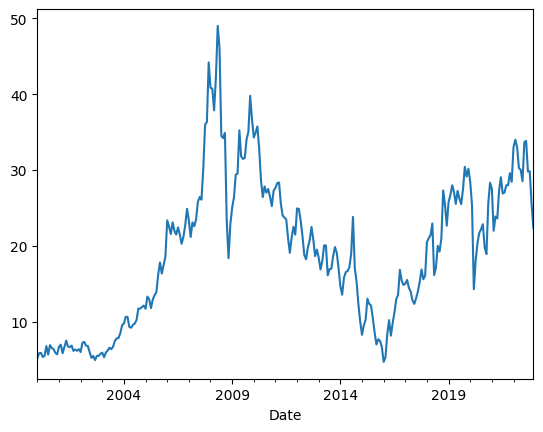

In [67]:
petr_month.Close.plot();

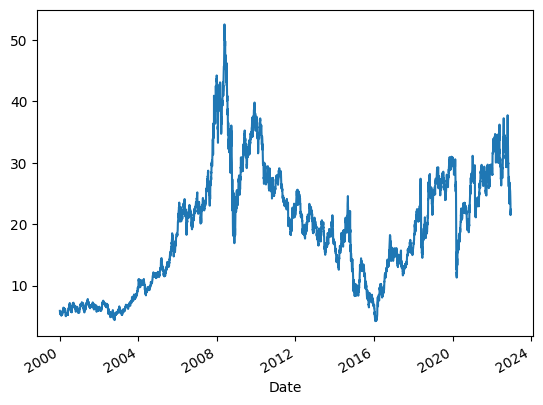

In [68]:
petr.Close.plot();

#### 2.5. Colunas: Filtrar, Renomear e Reordenar

In [69]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume,Horario,Dia do Ano
Date,,,,,,,,
2000-01-02 22:00:00-02:00,5.875,5.875,5.875,5.875,1.872027,35389440000,22:00:00,2
2000-01-03 22:00:00-02:00,5.550,5.550,5.550,5.550,1.768469,28861440000,22:00:00,3
2000-01-04 22:00:00-02:00,5.494,5.494,5.494,5.494,1.750625,43033600000,22:00:00,4
2000-01-05 22:00:00-02:00,5.475,5.475,5.475,5.475,1.744570,34055680000,22:00:00,5
2000-01-06 22:00:00-02:00,5.500,5.500,5.500,5.500,1.752536,20912640000,22:00:00,6


In [70]:
petr.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Horario',
       'Dia do Ano'],
      dtype='object')

In [71]:
list(petr.columns)

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Horario',
 'Dia do Ano']

Vamos retomar apenas as colunas originais OHLCV dos dados

In [72]:
petr[['Open', 'High', 'Low', 'Close', 'Volume']]

,Open,High,Low,Close,Volume
Date,,,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000,5.875000,35389440000
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000,5.550000,28861440000
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000,5.494000,43033600000
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000,5.475000,34055680000
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000,5.500000,20912640000
...,...,...,...,...,...
2022-12-12 21:00:00-03:00,24.100000,24.200001,23.309999,23.320000,102533100
2022-12-13 21:00:00-03:00,22.500000,22.600000,20.770000,21.469999,319501600
2022-12-14 21:00:00-03:00,21.000000,22.370001,20.830000,22.040001,132385600


In [73]:
petr_filtrada = petr[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

In [76]:
petr_filtrada

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000,5.875000,1.872027,35389440000
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000,5.550000,1.768469,28861440000
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000,5.494000,1.750625,43033600000
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000,5.475000,1.744570,34055680000
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000,5.500000,1.752536,20912640000
...,...,...,...,...,...,...
2022-12-12 21:00:00-03:00,24.100000,24.200001,23.309999,23.320000,23.320000,102533100
2022-12-13 21:00:00-03:00,22.500000,22.600000,20.770000,21.469999,21.469999,319501600
2022-12-14 21:00:00-03:00,21.000000,22.370001,20.830000,22.040001,22.040001,132385600


Retornar as 4 primeiras linhas

In [75]:
petr_filtrada.iloc[:4]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-02 22:00:00-02:00,5.875,5.875,5.875,5.875,1.872027,35389440000
2000-01-03 22:00:00-02:00,5.550,5.550,5.550,5.550,1.768469,28861440000
2000-01-04 22:00:00-02:00,5.494,5.494,5.494,5.494,1.750625,43033600000
2000-01-05 22:00:00-02:00,5.475,5.475,5.475,5.475,1.744570,34055680000


Retornar as 4 primeiras colunas 

In [79]:
petr_filtrada = petr_filtrada.iloc[:,:4]

##### Renomear as colunas

In [80]:
petr_filtrada.columns

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [81]:
petr_filtrada.columns = ['Abertura', 'Maxima', 'Minima', 'Fechamento']
petr_filtrada

,Abertura,Maxima,Minima,Fechamento
Date,,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000,5.875000
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000,5.550000
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000,5.494000
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000,5.475000
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000,5.500000
...,...,...,...,...
2022-12-12 21:00:00-03:00,24.100000,24.200001,23.309999,23.320000
2022-12-13 21:00:00-03:00,22.500000,22.600000,20.770000,21.469999
2022-12-14 21:00:00-03:00,21.000000,22.370001,20.830000,22.040001


Usamos um dicionario para renomear as colunas contendo a estrutura {'nome antigo':'novo nome'}

In [83]:
dicionario = {'Abertura':'Open', 'Maxima':'High','Minima':'Low','Fechamento':'Close'}
petr_filtrada = petr_filtrada.rename(dicionario, axis=1)

In [84]:
petr_filtrada.head()

,Open,High,Low,Close
Date,,,,
2000-01-02 22:00:00-02:00,5.875,5.875,5.875,5.875
2000-01-03 22:00:00-02:00,5.550,5.550,5.550,5.550
2000-01-04 22:00:00-02:00,5.494,5.494,5.494,5.494
2000-01-05 22:00:00-02:00,5.475,5.475,5.475,5.475
2000-01-06 22:00:00-02:00,5.500,5.500,5.500,5.500


Reordenar as colunas

In [85]:
list(petr_filtrada.columns)

['Open', 'High', 'Low', 'Close']

In [86]:
petr_filtrada[['Open', 'Close', 'Low', 'High']]

,Open,Close,Low,High
Date,,,,
2000-01-02 22:00:00-02:00,5.875000,5.875000,5.875000,5.875000
2000-01-03 22:00:00-02:00,5.550000,5.550000,5.550000,5.550000
2000-01-04 22:00:00-02:00,5.494000,5.494000,5.494000,5.494000
2000-01-05 22:00:00-02:00,5.475000,5.475000,5.475000,5.475000
2000-01-06 22:00:00-02:00,5.500000,5.500000,5.500000,5.500000
...,...,...,...,...
2022-12-12 21:00:00-03:00,24.100000,23.320000,23.309999,24.200001
2022-12-13 21:00:00-03:00,22.500000,21.469999,20.770000,22.600000
2022-12-14 21:00:00-03:00,21.000000,22.040001,20.830000,22.370001


##### Adicionando novas colunas em posicoes especificas

Tambem podemos inserir uma nova coluna nao necessariamento como a ultima(padrao), mas especificando qual a posicao, o nome e os dados em si

In [87]:
dados_nova_col = 'PETR4'

In [88]:
petr_filtrada.insert(0, 'Ativo', dados_nova_col)
petr_filtrada

,Ativo,Open,High,Low,Close
Date,,,,,
2000-01-02 22:00:00-02:00,PETR4,5.875000,5.875000,5.875000,5.875000
2000-01-03 22:00:00-02:00,PETR4,5.550000,5.550000,5.550000,5.550000
2000-01-04 22:00:00-02:00,PETR4,5.494000,5.494000,5.494000,5.494000
2000-01-05 22:00:00-02:00,PETR4,5.475000,5.475000,5.475000,5.475000
2000-01-06 22:00:00-02:00,PETR4,5.500000,5.500000,5.500000,5.500000
...,...,...,...,...,...
2022-12-12 21:00:00-03:00,PETR4,24.100000,24.200001,23.309999,23.320000
2022-12-13 21:00:00-03:00,PETR4,22.500000,22.600000,20.770000,21.469999
2022-12-14 21:00:00-03:00,PETR4,21.000000,22.370001,20.830000,22.040001


Metodo assign

Outra forma menos usual mas que pode ser util para criar novas colunas atraves do .assign

In [97]:
resultado = petr_filtrada['Close'] - petr_filtrada['Open']

In [98]:
petr_filtrada.assign(Resultado = resultado).tail()

,Ativo,Open,High,Low,Close,Resultado
Date,,,,,,
2022-12-12 21:00:00-03:00,PETR4,24.100000,24.200001,23.309999,23.320000,-0.780001
2022-12-13 21:00:00-03:00,PETR4,22.500000,22.600000,20.770000,21.469999,-1.030001
2022-12-14 21:00:00-03:00,PETR4,21.000000,22.370001,20.830000,22.040001,1.040001
2022-12-15 21:00:00-03:00,PETR4,21.959999,22.110001,21.510000,22.049999,0.090000
2022-12-18 21:00:00-03:00,PETR4,22.100000,22.469999,21.639999,22.350000,0.250000


#### 2.6. Dataframes mais complexos, incluindo multi-index

Para demonstrar manipulacoes de dados em um dataframe de varias colunas, vamos extrair os dados das acoes que compoem o IBOV.\
Para saber a composicao atualizada do IBOV: https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm

In [2]:
import pandas as pd


In [11]:
ibov = pd.read_csv('/home/chibana/Documents/GitHub/Study_Area/Python/Data_Trading/Modulo 2/Data/IBOVDia_29-04-24.csv', sep=';', encoding='latin-1', skiprows=2)
ibov = ibov.iloc[:-2,0]
tickers_IBOV = ibov.values.tolist()
tickers_IBOV


['ALOS3',
 'ALPA4',
 'ABEV3',
 'ARZZ3',
 'ASAI3',
 'AZUL4',
 'B3SA3',
 'BBSE3',
 'BBDC3',
 'BBDC4',
 'BRAP4',
 'BBAS3',
 'BRKM5',
 'BRFS3',
 'BPAC11',
 'CRFB3',
 'BHIA3',
 'CCRO3',
 'CMIG4',
 'CIEL3',
 'COGN3',
 'CPLE6',
 'CSAN3',
 'CPFE3',
 'CMIN3',
 'CVCB3',
 'CYRE3',
 'DXCO3',
 'ELET3',
 'ELET6',
 'EMBR3',
 'ENGI11',
 'ENEV3',
 'EGIE3',
 'EQTL3',
 'EZTC3',
 'FLRY3',
 'GGBR4',
 'GOAU4',
 'NTCO3',
 'SOMA3',
 'HAPV3',
 'HYPE3',
 'IGTI11',
 'IRBR3',
 'ITSA4',
 'ITUB4',
 'JBSS3',
 'KLBN11',
 'RENT3',
 'LREN3',
 'LWSA3',
 'MGLU3',
 'MRFG3',
 'BEEF3',
 'MRVE3',
 'MULT3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'RECV3',
 'PRIO3',
 'PETZ3',
 'RADL3',
 'RAIZ4',
 'RDOR3',
 'RAIL3',
 'SBSP3',
 'SANB11',
 'SMTO3',
 'CSNA3',
 'SLCE3',
 'SUZB3',
 'TAEE11',
 'VIVT3',
 'TIMS3',
 'TOTS3',
 'TRPL4',
 'UGPA3',
 'USIM5',
 'VALE3',
 'VAMO3',
 'VBBR3',
 'WEGE3',
 'YDUQ3']

Ponto Importante

As acoes brasileiras no Yahoo Finance terminam com ".SA". Isso e valido inclusive para outros papeis, como ETFs, FIIs, BDRs.

Como acrescentar ".SA" ao fim do nome de um papel?

In [12]:
tickers_IBOV_SA = [i + '.SA' for i in tickers_IBOV]
tickers_IBOV_SA

['ALOS3.SA',
 'ALPA4.SA',
 'ABEV3.SA',
 'ARZZ3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBSE3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BRAP4.SA',
 'BBAS3.SA',
 'BRKM5.SA',
 'BRFS3.SA',
 'BPAC11.SA',
 'CRFB3.SA',
 'BHIA3.SA',
 'CCRO3.SA',
 'CMIG4.SA',
 'CIEL3.SA',
 'COGN3.SA',
 'CPLE6.SA',
 'CSAN3.SA',
 'CPFE3.SA',
 'CMIN3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENGI11.SA',
 'ENEV3.SA',
 'EGIE3.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'NTCO3.SA',
 'SOMA3.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IGTI11.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'KLBN11.SA',
 'RENT3.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'BEEF3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'RECV3.SA',
 'PRIO3.SA',
 'PETZ3.SA',
 'RADL3.SA',
 'RAIZ4.SA',
 'RDOR3.SA',
 'RAIL3.SA',
 'SBSP3.SA',
 'SANB11.SA',
 'SMTO3.SA',
 'CSNA3.SA',
 'SLCE3.SA',
 'SUZB3.SA',
 'TAEE11.SA',
 'VIVT3.SA',
 'TIMS3.SA',
 'TOTS

In [13]:
import yfinance as yf

In [14]:
yf.download('VALE3.SA', start = '2021-01-01', end = '2021-12-31', period = '1d')

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,89.349998,91.480003,88.849998,91.459999,63.861279,37865500
2021-01-05,91.459999,93.000000,90.519997,93.000000,64.936569,34300300
2021-01-06,94.980003,96.349998,94.400002,96.050003,67.066216,53722500
2021-01-07,96.610001,102.529999,96.610001,102.320000,71.444183,74541400
2021-01-08,103.010002,103.349998,98.199997,102.000000,71.220749,58562700
...,...,...,...,...,...,...
2021-12-23,79.949997,80.059998,78.800003,79.150002,65.014168,13121200
2021-12-27,78.870003,79.449997,78.260002,78.949997,64.849884,11371400
2021-12-28,78.510002,78.529999,76.570000,77.050003,63.289215,18923700


##### Extracao para varios ativos de uma vez

In [15]:
cotacoes_IBOV = yf.download(tickers_IBOV_SA, start = '2021-01-01', end = '2021-12-31', period = '1d')

[*********************100%%**********************]  85 of 85 completed

1 Failed download:
['ALOS3.SA']: Exception("%ticker%: Data doesn't exist for startDate = 1609470000, endDate = 1640919600")


In [16]:
cotacoes_IBOV.to_csv('/home/chibana/Documents/GitHub/Study_Area/Python/Data_Trading/Modulo 2/Data/cotacoes_IBOV.csv')

In [17]:
cotacoes_csv = pd.read_csv('/home/chibana/Documents/GitHub/Study_Area/Python/Data_Trading/Modulo 2/Data/cotacoes_IBOV.csv', header = [0, 1], index_col=0)

In [22]:
cotacoes_IBOV.columns

MultiIndex([('Adj Close', 'ABEV3.SA'),
            ('Adj Close', 'ALOS3.SA'),
            ('Adj Close', 'ALPA4.SA'),
            ('Adj Close', 'ARZZ3.SA'),
            ('Adj Close', 'ASAI3.SA'),
            ('Adj Close', 'AZUL4.SA'),
            ('Adj Close', 'B3SA3.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ...
            (   'Volume', 'TOTS3.SA'),
            (   'Volume', 'TRPL4.SA'),
            (   'Volume', 'UGPA3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE3.SA'),
            (   'Volume', 'VAMO3.SA'),
            (   'Volume', 'VBBR3.SA'),
            (   'Volume', 'VIVT3.SA'),
            (   'Volume', 'WEGE3.SA'),
            (   'Volume', 'YDUQ3.SA')],
           names=['Price', 'Ticker'], length=510)

Visualizacao dos niveis de um dataframe

In [21]:
set(cotacoes_IBOV.columns.get_level_values(0))

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

Poderiamos 'dropar' o index 0 para nao sermos multi-index. Nesse exemplo nao faria tanto sentido pois perderiamos o parametro base OHLCV. Mas pode ser util em outras tabelas

In [23]:
cotacoes_IBOV.droplevel(0, axis=1)

Ticker,ABEV3.SA,ALOS3.SA,ALPA4.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TOTS3.SA,TRPL4.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VAMO3.SA,VBBR3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,13.386032,NaN,41.159180,63.697300,NaN,37.730000,17.988939,11.739101,16.385420,18.480341,...,5443040,2443000,11878657,20687900,37865500,NaN,3953500,2791400,7219800,2640400
2021-01-05,13.671392,NaN,41.178944,62.723099,NaN,38.200001,18.024345,11.617306,16.307083,18.367670,...,4441586,1108700,11782070,18302900,34300300,NaN,12993100,2899200,16633600,3703500
2021-01-06,13.948107,NaN,38.935696,59.013676,NaN,36.669998,17.729343,11.882755,16.717020,18.976429,...,5526344,1024400,14248832,23592900,53722500,NaN,10884000,5790100,21507400,5004000
2021-01-07,13.878928,NaN,38.243946,58.938744,NaN,36.049999,18.224937,12.354317,17.126947,19.480225,...,3330663,1237300,12239176,22298600,74541400,NaN,6954300,5213500,15129600,6138600
2021-01-08,14.294000,NaN,40.220375,60.044079,NaN,36.599998,18.493387,12.426146,16.994940,19.312288,...,8448005,1418800,9657378,23237000,58562700,NaN,8434100,2916600,17381000,2685800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,14.037923,NaN,36.350895,70.294128,13.893169,26.459999,10.465547,10.600347,13.004399,15.460734,...,2731000,702200,2238400,10681800,13121200,1383482.0,3932100,1382200,2166400,1731000
2021-12-27,14.019868,NaN,36.460327,70.995476,13.449455,25.670000,10.401170,10.622113,13.140443,15.637519,...,3040900,530400,5340800,10504500,11371400,1768251.0,4196700,1492300,4457200,1809000
2021-12-28,14.010840,NaN,36.559811,71.175537,12.917000,25.750000,10.263227,10.560442,13.132441,15.581271,...,3269600,688600,3777100,13201600,18923700,1405681.0,3743000,1060000,3670800,1710500


Filtrar apenas o indice que contem os precos de adj Close

In [28]:
cotacoes_IBOV_adj_close_abev = cotacoes_IBOV[('Adj Close', 'ABEV3.SA')]
cotacoes_IBOV_adj_close_abev

Date
2021-01-04    13.386032
2021-01-05    13.671392
2021-01-06    13.948107
2021-01-07    13.878928
2021-01-08    14.294000
                ...    
2021-12-23    14.037923
2021-12-27    14.019868
2021-12-28    14.010840
2021-12-29    13.947647
2021-12-30    13.920564
Name: (Adj Close, ABEV3.SA), Length: 247, dtype: float64

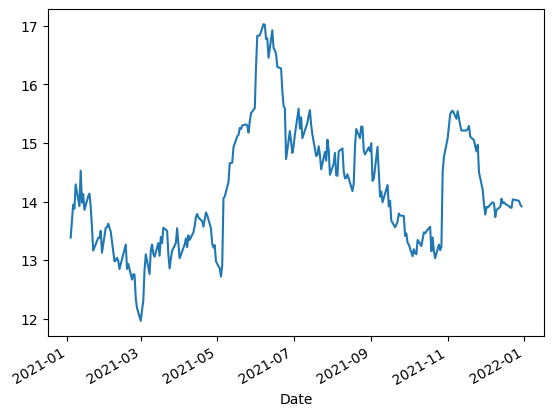

In [29]:
cotacoes_IBOV_adj_close_abev.plot();

Usando pd.DataFrame podemos reconfigurar como data frame

In [31]:
cotacoes_IBOV_adj_close_abev = pd.DataFrame(cotacoes_IBOV_adj_close_abev)
cotacoes_IBOV_adj_close_abev

,Adj Close
,ABEV3.SA
Date,
2021-01-04,13.386032
2021-01-05,13.671392
2021-01-06,13.948107
2021-01-07,13.878928
2021-01-08,14.294000
...,...
2021-12-23,14.037923
2021-12-27,14.019868
